In [1]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import webbrowser

In [2]:
def load_dataset():
    url_pattern = 'https://www.wine.com/list/wine/7155/{}?shipsSoonest=true'
    num_pages = 480
    wine_data = []
    for page_number in range(1, num_pages + 1):
        url = url_pattern.format(page_number)
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            wine_scrap = soup.find_all('div', class_='listGridItemInfo')
            # print(wine_scrap)
            
            for product in wine_scrap:
                wine_name = product.select_one("span", class_ = "listGridItemInfo_name").get_text(strip=True)
                wine_rating = product.find("span", class_='averageRating_average').get_text(strip=True)
                nbr_rating = product.find('span', class_='averageRating_number').get_text(strip=True)
                try:
                    wine_price = product.find('span', class_ = 'productPrice_price-saleWhole').text
                    wine_price2 = product.find('span', class_='productPrice_price-saleFractional').get_text(strip=True)
                except:
                    wine_price = product.find('span', class_='productPrice_price-regWhole').text
                    wine_price2 = product.find('span', class_='productPrice_price-regFractional').get_text(strip=True)
                
                try:
                    wine_type = product.select_one('div.listGridItemAttrs ul li')['title']
                except:
                    wine_type = 'Dessert'
                try:
                    comments = product.find('span', class_='wineRatings_rating').text
                except:
                    comments = "NaN"
                location = product.find('span', class_='listGridItemOrigin_text').text
                wine_link = product.a.attrs['href']
                wine_data.append({"Wine_name": wine_name, 
                                'Average_rating': wine_rating, 
                                'Number_of_ratings': nbr_rating, 
                                'Wine_price_$': wine_price + '.' + wine_price2, 
                                "Wine_type": wine_type, 
                                'Comments_rating': comments,
                                'Location': location,
                                'Wine_link': 'https://www.wine.com'+wine_link})
    return pd.DataFrame(wine_data)



In [3]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("\nFirst 10 rows of dataset:")
    print(dataset.head(10))
    print("\nStatistical summary:")
    print(dataset.describe())
    


In [4]:
# Data Cleaning
def clean_dataset(dataset):
    # Perform data cleaning steps (handle missing values, convert data types, etc.)
    dataset['Average_rating'] = dataset['Average_rating'].astype('float64')
    dataset
    dataset['Number_of_ratings'] = dataset['Number_of_ratings'].astype('int64')
    dataset.info()
    dataset['Wine_price_$'] = dataset['Wine_price_$'].str.replace(',', '').astype('float64')
    dataset.info()
    dataset['Comments_rating'] = dataset['Comments_rating'].replace('NaN', np.nan)
    dataset['Comments_rating'] = pd.to_numeric(dataset['Comments_rating'])
    second_drop = dataset[(dataset['Number_of_ratings'] < 20) & (dataset['Comments_rating'].isna())].index
    dataset.drop(second_drop, inplace=True)
    dataset.reset_index(drop=True, inplace=True)
    dataset['Comments_rating'] = dataset['Comments_rating'].replace(np.nan, dataset['Comments_rating'].mode()[0])
    
    
    return dataset

In [5]:
def scrape_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find the div with class "viewMoreModule_text" and get its text
            content = soup.find('div', class_='viewMoreModule_text').get_text(strip=True)
            return content
        else:
            print("Failed to retrieve page:", response.status_code)
            return None
    except Exception as e:
        print("Error:", e)
        return None
    
    



In [6]:
def print_histograms(boston_dataframe):
    boston_dataframe.hist(bins=30, figsize=(10,8))
    plt.show()


In [7]:
def compute_correlations_matrix(dataframe):
    # Exclude non-numeric columns before computing correlations
    numeric_df = dataframe.select_dtypes(include=['number'])
    
    # Compute the correlation matrix
    correlations = numeric_df.corr()
    
    # Plot the correlation matrix as a heatmap
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()


In [8]:
def print_scatter_matrix(dataframe):
    pd.plotting.scatter_matrix(dataframe, figsize=(15, 15))
    plt.show()


The main function with some lines of code commented out, as web scraping takes more time than I would like to spend on it.
So after selecting and cleaning the data, I saved it to a csv file that you can open and explore at will.

Dataset dimension:
(6207, 9)

First 10 rows of dataset:
                                           Wine_name  Average_rating  \
0                    Andreola Col del Forno Prosecco             4.4   
1                       L'Aventure Estate Cuvee 2020             4.7   
2              Paxton Vineyards Quandong Shiraz 2021             4.4   
3  Craggy Range Winery Te Kahu Gimblett Gravels V...             4.3   
4  Tenute Neirano Tirteo Barbera D'Asti Superiore...             4.3   
5  Vinos de Arganza Flavium Premium Crianza Menci...             4.0   
6                     Viticcio Chianti Classico 2020             4.2   
7                         Eguren Ugarte Cosecha 2021             4.4   
8         Emilio Moro Malleolus de Valderramiro 2019             4.8   
9                  Eden Rift Palmtag Pinot Noir 2018             4.1   

   Number_of_ratings  Wine_price_$              Wine_type  Comments_rating  \
0                 16         25.99  Sparkling & Champagne             92.

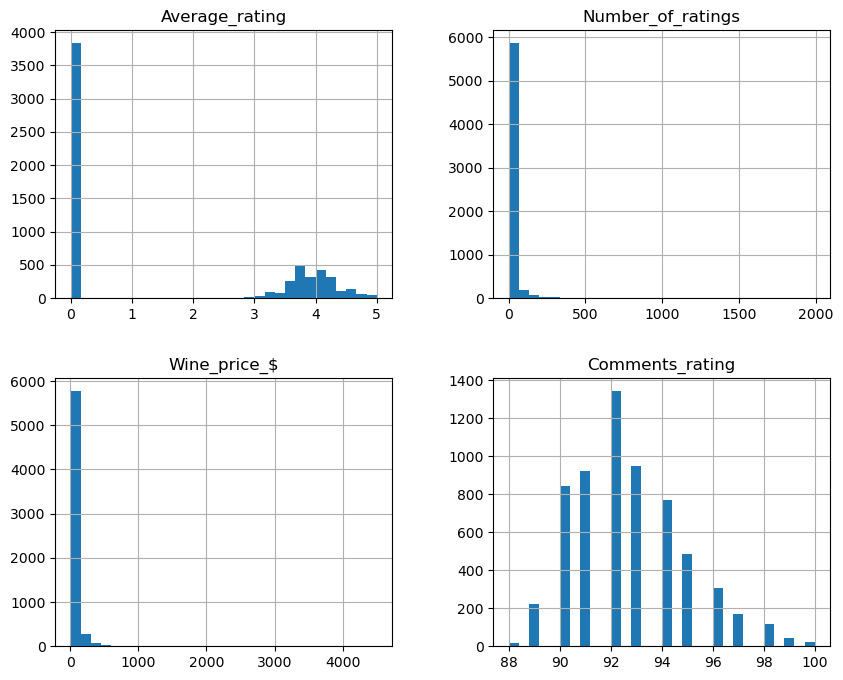

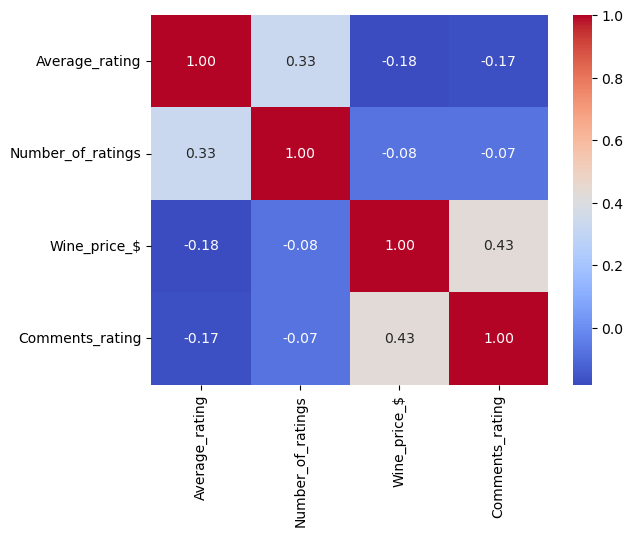

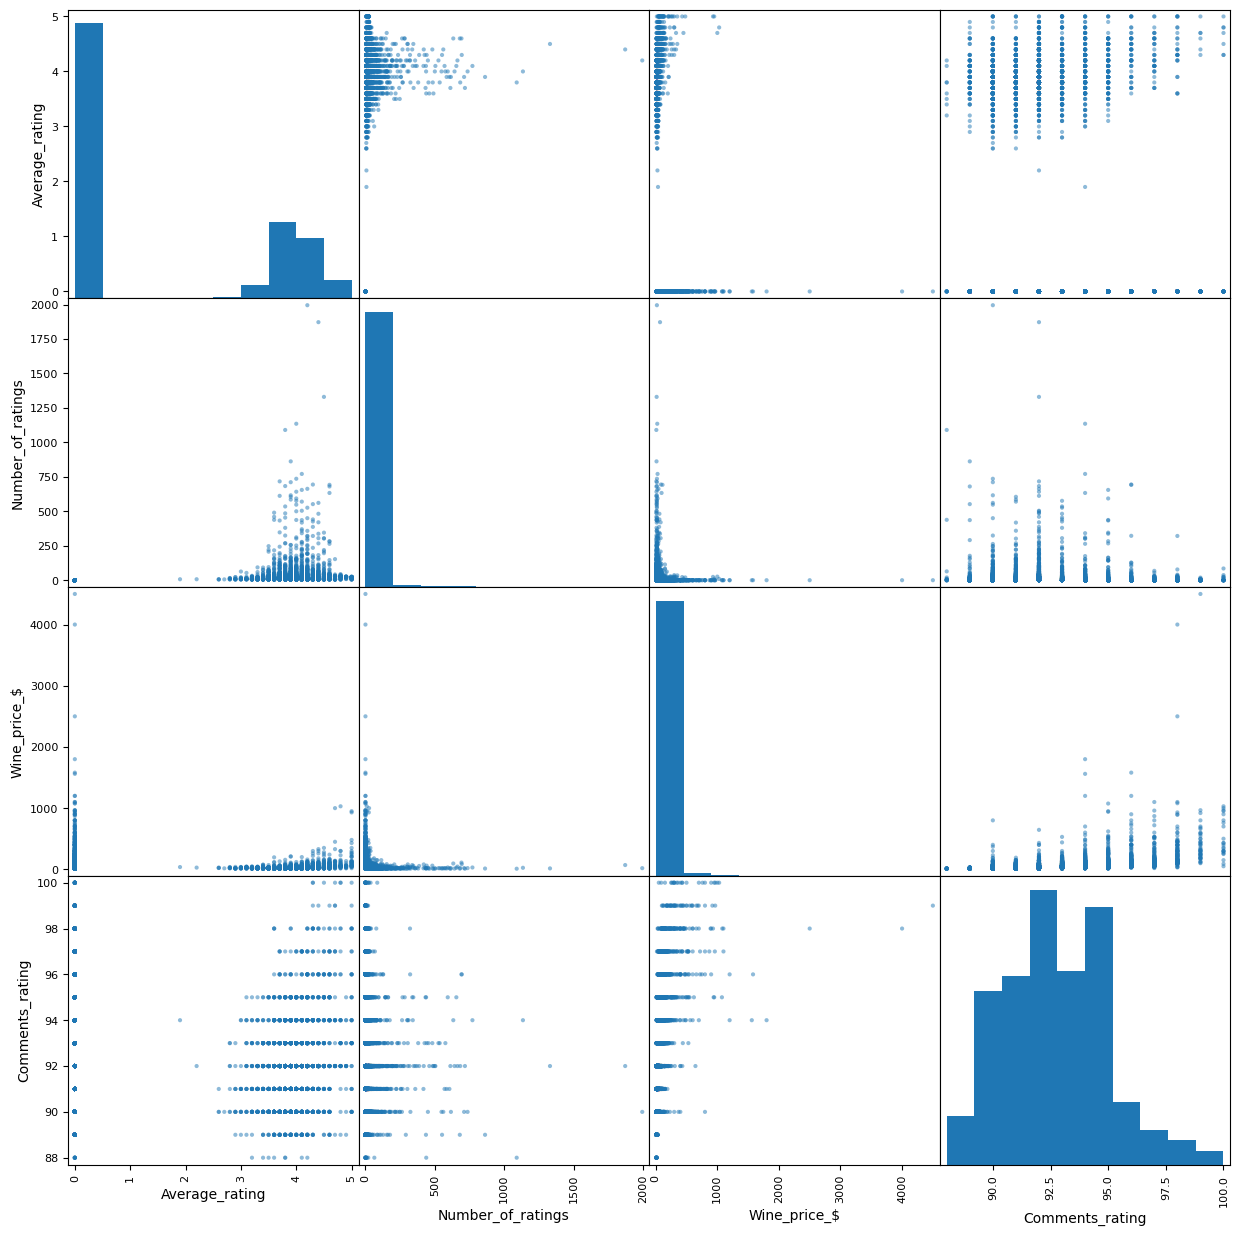

In [9]:
def main():
    # wine_dataset = load_dataset()
    # cleaned_dataset = clean_dataset(wine_dataset)
    
    # scraped_contents = []    

    # for url in cleaned_dataset['Wine_link']:

    #     scraped_content = scrape_content(url)
    #     scraped_contents.append(scraped_content)
        
    # cleaned_dataset['scraped_content'] = scraped_contents
    # print_histograms(clean_dataset)
    # compute_correlations_matrix(clean_dataset)
    # print_scatter_matrix(clean_dataset)
    wine_df = pd.read_csv('wine_data_for_recomendations.csv')
    print_summarize_dataset(wine_df)
    print_histograms(wine_df)
    compute_correlations_matrix(wine_df)
    print_scatter_matrix(wine_df)




if __name__ == "__main__":
    main()

# Exploratory Data Analysis (EDA):

In [10]:
wine_df = pd.read_csv('wine_data_for_recomendations.csv')
wine_df.head()


,Wine_name,Average_rating,Number_of_ratings,Wine_price_$,Wine_type,Comments_rating,Location,Wine_link,Descriptions
0,Andreola Col del Forno Prosecco,4.4,16,25.99,Sparkling & Champagne,92.0,"Valdobbiadene, Prosecco, Italy",https://www.wine.com/product/andreola-col-del-...,vines cultivated at over 240 metres above sea ...
1,L'Aventure Estate Cuvee 2020,4.7,5,124.99,Red Wine,99.0,"Willow Creek District, Paso Robles, Central Co...",https://www.wine.com/product/laventure-estate-...,l'aventure was founded in 1998 by a french win...
2,Paxton Vineyards Quandong Shiraz 2021,4.4,7,28.99,Red Wine,95.0,"McLaren Vale, South Australia, Australia",https://www.wine.com/product/paxton-vineyards-...,quandong farm shiraz is a single vineyard wine...
3,Craggy Range Winery Te Kahu Gimblett Gravels V...,4.3,12,21.99,Red Wine,94.0,"Hawkes Bay, New Zealand",https://www.wine.com/product/craggy-range-wine...,craggy range is a family owned winery establis...
4,Tenute Neirano Tirteo Barbera D'Asti Superiore...,4.3,74,11.99,Red Wine,90.0,"Asti, Piedmont, Italy",https://www.wine.com/product/tenute-neirano-ti...,the wine shows an elegant aroma woven from the...


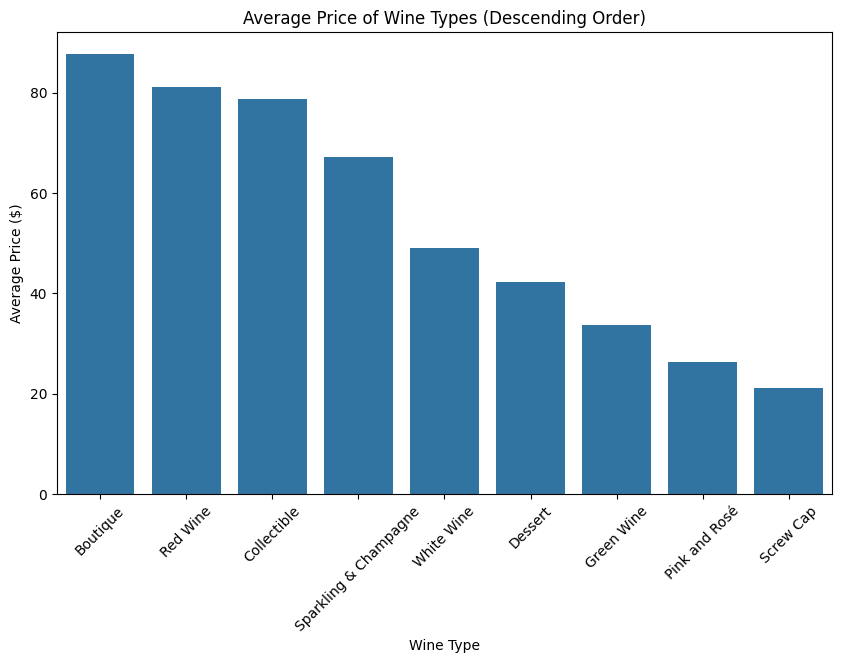

In [16]:
# Calculate average price for each wine type
average_prices = wine_df.groupby('Wine_type')['Wine_price_$'].mean().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Price of Wine Types (Descending Order)')
plt.xlabel('Wine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


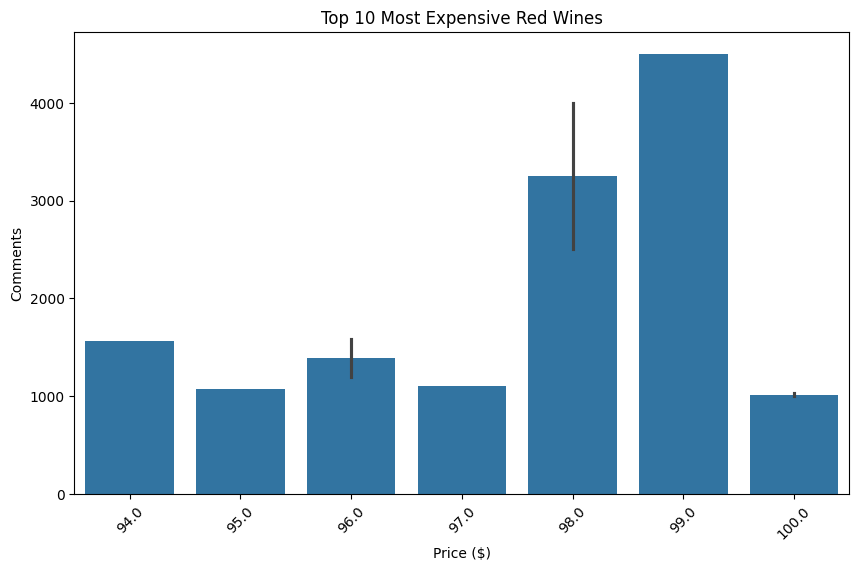

In [41]:
red_wine_df = wine_df[wine_df['Wine_type'] == 'Red Wine']

# Sort red wine DataFrame by price in descending order
red_wine_sorted = red_wine_df.sort_values(by='Wine_price_$', ascending=False)

# Select top 10 most expensive red wines
top_10_expensive_red = red_wine_sorted.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Comments_rating', y='Wine_price_$', data=top_10_expensive_red)
plt.title('Comments Rating of Top 10 Most Expensive Red Wines')
plt.xlabel('Price ($)')
plt.ylabel('Comments')
plt.xticks(rotation=45)
plt.show()


In [46]:

# Preprocess data
wine_df.dropna(subset=['Descriptions', 'Wine_type'], inplace=True)  # drop rows with missing values
wine_df['Descriptions'] = wine_df['Descriptions'].str.lower()  # convert descriptions to lowercase

# Build TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(wine_df['Descriptions'] + ' ' + wine_df['Wine_type'])

# Function to recommend similar wine
def recommend_wines(user_input, threshold=0.2):
    # Convert user input to lowercase
    user_input = user_input.lower()
    
    # Find similar wines
    user_tfidf = tfidf_vectorizer.transform([user_input])
    similarity_scores = cosine_similarity(user_tfidf, tfidf_matrix)
    
    # Find wines with similarity scores above the threshold
    similar_wines_idx = similarity_scores.argsort()[0][::-1]
    similar_wines = []
    for idx in similar_wines_idx:
        if similarity_scores[0][idx] > threshold:
            similar_wines.append(wine_df.iloc[idx])
    
    return similar_wines

def open_links(similar_wines):
    for wine in similar_wines[:10]:
        webbrowser.open(wine['Wine_link'])

# Example usage
user_input = input("Enter the name or type of wine: ")
similar_wines = recommend_wines(user_input)

if similar_wines:
    print("Opening links for similar wines...")
    open_links(similar_wines)
else:
    print("No similar wines found.")

Opening links for similar wines...
